###
    Code is based on MSC Thesis 
###

https://en.wikipedia.org/wiki/Wavelet#:~:text=A%20wavelet%20is%20a%20mathematical,resolution%20that%20matches%20its%20scale



https://en.wikipedia.org/wiki/Discrete_wavelet_transform

In [5]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import librosa
from scipy.io import wavfile
import pywt
from scipy import signal
import statistics as stat
from sklearn.metrics import mean_squared_error

In [6]:
audio_path = r"..."
y, sr = librosa.load(audio_path)

time = np.arange(0,len(y))/sr

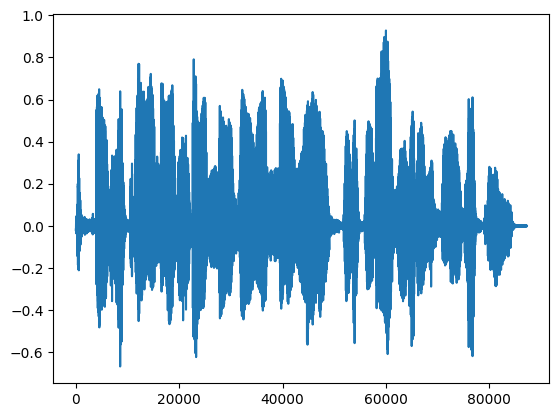

22050 87298


In [7]:
plt.plot(y)
plt.show()
print(sr, len(y))

Audio Denoise Using Wavelet

(21829,) (21829,) (21829,)


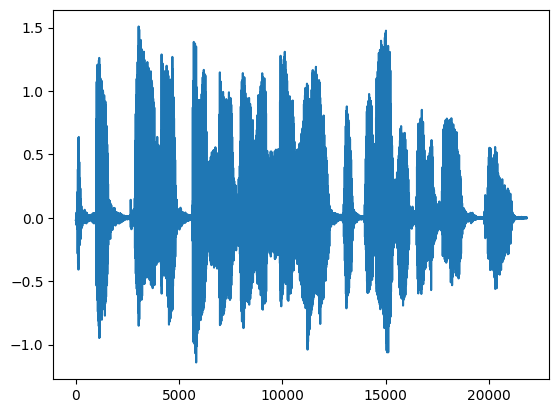

In [8]:
# raw testing 
ca2, cd2, cd1 = pywt.wavedec(y, 'db4', level=2)
print(ca2.shape, cd2.shape, ca2.shape)

plt.plot(ca2)

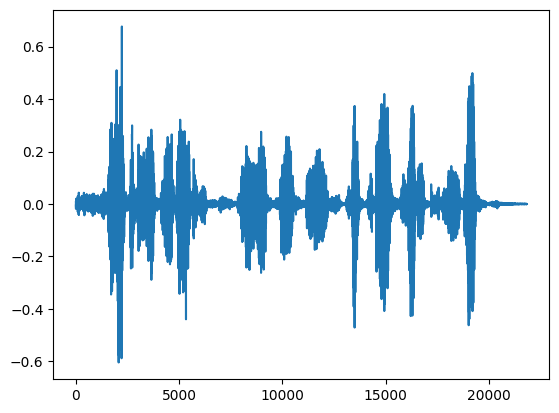

In [9]:
plt.plot(cd2)

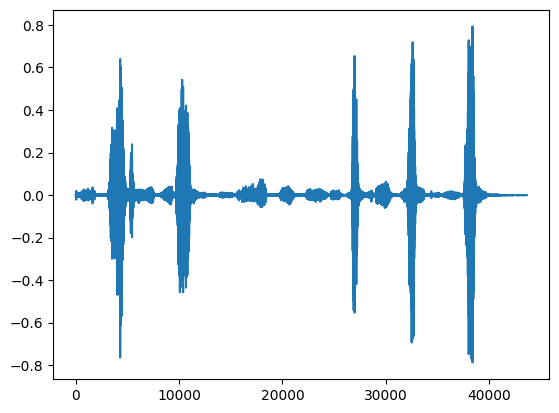

In [10]:
plt.plot(cd1)

Thresholding = Soft or Hard

Other = MinMax, Rigesure, Sqtwolog, Heurure


#  https://pywavelets.readthedocs.io/en/latest/ref/index.html 

Compact Function


In [19]:
def wavelet_level2(audio, name):

    ca2, cd2, cd1 = pywt.wavedec(audio, wavelet='db4', level=2)
    noise_level = stat.median(abs(audio))/ 0.6745 #median formula

    #sqtwolog 
    th_s = stat.sqrt(2*stat.log(len(audio)))*noise_level
    #minmax
    th_m = noise_level*(0.3936 + 0.1829*stat.log(len(audio)))

    denoised_ca2 = pywt.threshold(data=ca2, value=th_s, mode='soft')
    #denoised_2 = pywt.threshold(data=cd1, value=th_s, mode='soft', substitute=0)
    #denoised_3 = pywt.threshold_firm(data=cd1, value_low=th_s, value_high=th_s)

    denoised_cd2 = pywt.threshold(data=cd2, value=th_s, mode='soft')  
    denoised_cd1 = pywt.threshold(data=cd1, value=th_s, mode='soft')
    
    # print(denoised_cd2.shape, ca2.shape)

    out_sig = pywt.waverec([denoised_ca2, denoised_cd2, denoised_cd1], 'db4')
    # print(out_sig.shape, audio.shape)

    diff = audio - out_sig
    print("values changed by: ", sum(abs(diff))/len(diff)*100, " %")
    print("MSE:  ", mean_squared_error(audio,out_sig))


    return out_sig

In [20]:
wavelet_level2(y,'db4')

values changed by:  8.658799791052491  %
MSE:   0.013988947


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)